In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

# fit_out and intensities folders
fit_outs_folder = './data/fit_outs/'
intensities_folder = './data/Idts/'

## Load fit output from the 'fit_outs' directory

In [22]:
fit_out_files = os.listdir(fit_outs_folder)
# order the files in alphabetical order
fit_out_files.sort()
# load fit parameters
fit_outs = {}
for f in fit_out_files:
    fit_outs[f[8:-4]] = pd.read_csv(fit_outs_folder + f)


In [23]:
intensities_files = os.listdir(intensities_folder)
# order the files in alphabetical order
intensities_files.sort()
# load intensities
intensities = {}
for f in intensities_files:
    # load npz file here
    intensities[f[4:-4]] = np.load(intensities_folder + f)

## Define scan parameters

In [24]:
for i in fit_outs.keys():
    print('\''+i+'\': ,')

'GeO2_6_0001_0007': ,
'GeO2_6_0001_0008': ,
'GeO2_6_0001_0009': ,
'GeO2_6_0001_0011': ,
'GeO2_6_0001_0012': ,
'GeO2_6_100C_0001_0003': ,
'GeO2_6_170C_0001_0001': ,
'GeO2_6_240C_0001_0003': ,
'GeO2_6_310C_0001_0003': ,
'GeO2_6_380C_0001_0001': ,
'GeO2_6_450C_0001_0003': ,
'GeO2_6_520C_0001_0001': ,
'GeO2_6_590C_0001_0003': ,
'GeO2_6_660C_0001_0001': ,


In [25]:
scan_d={
'GeO2_6_0001_0007': 100,
'GeO2_6_0001_0008': 100,
'GeO2_6_0001_0009': 100,
'GeO2_6_0001_0011': 100,
'GeO2_6_0001_0012': 100,
'GeO2_6_100C_0001_0003': 100,
'GeO2_6_170C_0001_0001': 100,
'GeO2_6_240C_0001_0003': 100,
'GeO2_6_310C_0001_0003': 100,
'GeO2_6_380C_0001_0001': 100,
'GeO2_6_450C_0001_0003': 100,
'GeO2_6_520C_0001_0001': 100,
'GeO2_6_590C_0001_0003': 100,
'GeO2_6_660C_0001_0001': 100,
}

scan_T={
'GeO2_6_0001_0007': 30,
'GeO2_6_0001_0008': 30,
'GeO2_6_0001_0009': 30,
'GeO2_6_0001_0011': 30,
'GeO2_6_0001_0012': 30,
'GeO2_6_100C_0001_0003': 100,
'GeO2_6_170C_0001_0001': 170,
'GeO2_6_240C_0001_0003': 240,
'GeO2_6_310C_0001_0003': 310,
'GeO2_6_380C_0001_0001': 380,
'GeO2_6_450C_0001_0003': 450,
'GeO2_6_520C_0001_0001': 520,
'GeO2_6_590C_0001_0003': 590,
'GeO2_6_660C_0001_0001': 660,
}

scan_E={
'GeO2_6_0001_0007': 9.7,
'GeO2_6_0001_0008': 9.7,
'GeO2_6_0001_0009': 9.7,
'GeO2_6_0001_0011': 9.7,
'GeO2_6_0001_0012': 9.7,
'GeO2_6_100C_0001_0003': 9.7,
'GeO2_6_170C_0001_0001': 9.7,
'GeO2_6_240C_0001_0003': 9.7,
'GeO2_6_310C_0001_0003': 9.7,
'GeO2_6_380C_0001_0001': 9.7,
'GeO2_6_450C_0001_0003': 9.7,
'GeO2_6_520C_0001_0001': 9.7,
'GeO2_6_590C_0001_0003': 9.7,
'GeO2_6_660C_0001_0001': 9.7,
}

scan_Q={
'GeO2_6_0001_0007': 0.19,
'GeO2_6_0001_0008': 0.19,
'GeO2_6_0001_0009': 0.19,
'GeO2_6_0001_0011': 0.19,
'GeO2_6_0001_0012': 0.19,
'GeO2_6_100C_0001_0003': 0.19,
'GeO2_6_170C_0001_0001': 0.19,
'GeO2_6_240C_0001_0003': 0.19,
'GeO2_6_310C_0001_0003': 0.19,
'GeO2_6_380C_0001_0001': 0.19,
'GeO2_6_450C_0001_0003': 0.19,
'GeO2_6_520C_0001_0001': 0.19,
'GeO2_6_590C_0001_0003': 0.19,
'GeO2_6_660C_0001_0001': 0.19,
}
    

## Dose rate definition

In [26]:
A = {8.67: np.pi*7*5, 21.67: np.pi*5.2*4.4, 15.875: np.pi*7.1*3.7}

# density of GeO2
rho = 3.7 * 10**(-4*3) * 10**(-3) # kg/um^3

# Photon flux
phi = {8.67: 2.1e12, 21.67: 8.3e11, 15.875: 9.3e11}

# attenuation length
la = {8.67: 68, 21.67: 113, 15.875: 'x'}

dose_rate= lambda E, d: phi[E]*(1-np.exp(-d/la[E]))*(E*1.6022e-16)/(rho*A[E]*d)



In [27]:
columns = ['Q','E', 't', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0']
df = pd.DataFrame(columns=columns)
for i in scan_E.keys():
    fit_outs[i]['T'] = scan_T[i]
    fit_outs[i]['d'] = scan_d[i]
    fit_outs[i]['E'] = scan_E[i]
    fit_outs[i]['Q'] = scan_Q[i]
    #fit_outs[i]['dose_rate'] = dose_rate(scan_E[i], scan_d[i])
    df = pd.concat([df,fit_outs[i]], ignore_index=True)
display(df)

/tmp/ipykernel_3638461/1186650226.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,fit_outs[i]], ignore_index=True)


,Q,E,t,tau,beta,c,y0,dtau,dbeta,dc,dy0,T,d
0,0.19,9.7,100.3,5.120774,0.708223,0.033294,1.002154,0.454624,0.041912,0.001682,0.000064,30.0,100.0
1,0.19,9.7,200.1,4.992100,0.691039,0.033923,1.002129,0.396135,0.034336,0.001491,0.000036,30.0,100.0
2,0.19,9.7,600.3,5.406769,0.751033,0.032156,1.002198,0.320720,0.031687,0.001117,0.000030,30.0,100.0
3,0.19,9.7,1000.6,5.597825,0.749136,0.031294,1.002204,0.373041,0.035428,0.001219,0.000033,30.0,100.0
4,0.19,9.7,201.0,5.129552,0.731202,0.033302,1.002254,0.367566,0.036585,0.001349,0.000038,30.0,100.0
5,0.19,9.7,603.0,5.299846,0.734615,0.033012,1.002226,0.371295,0.036210,0.001312,0.000038,30.0,100.0
6,0.19,9.7,1005.0,5.075255,0.720637,0.033559,1.002156,0.330246,0.032038,0.001222,0.000034,30.0,100.0
7,0.19,9.7,30.2,2.201833,1.077859,0.029380,1.002433,0.443218,0.270860,0.004383,0.000282,30.0,100.0
8,0.19,9.7,90.5,4.610490,1.054386,0.029985,1.002584,0.507562,0.145166,0.002458,0.000254,30.0,100.0
9,0.19,9.7,150.8,5.552337,0.934220,0.029770,1.002289,0.613054,0.114139,0.002328,0.000274,30.0,100.0


## Fit parameters

### Params vs temperature & time

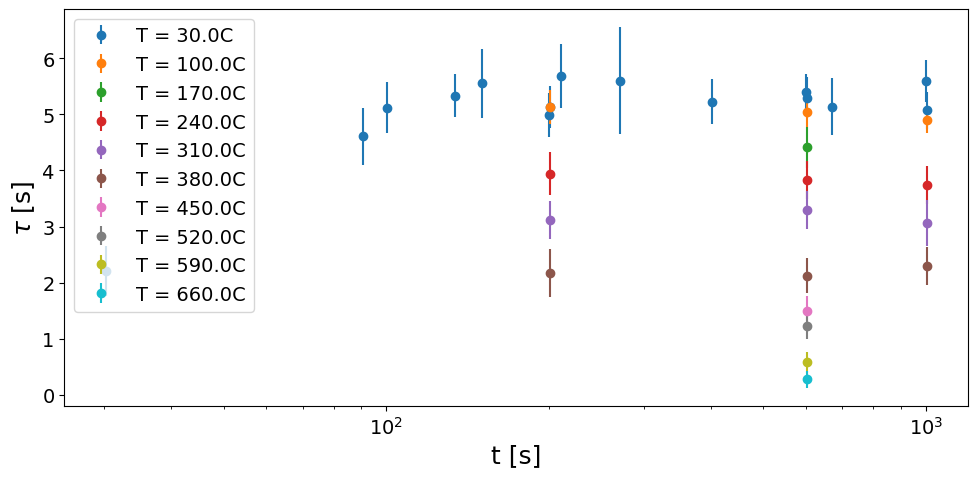

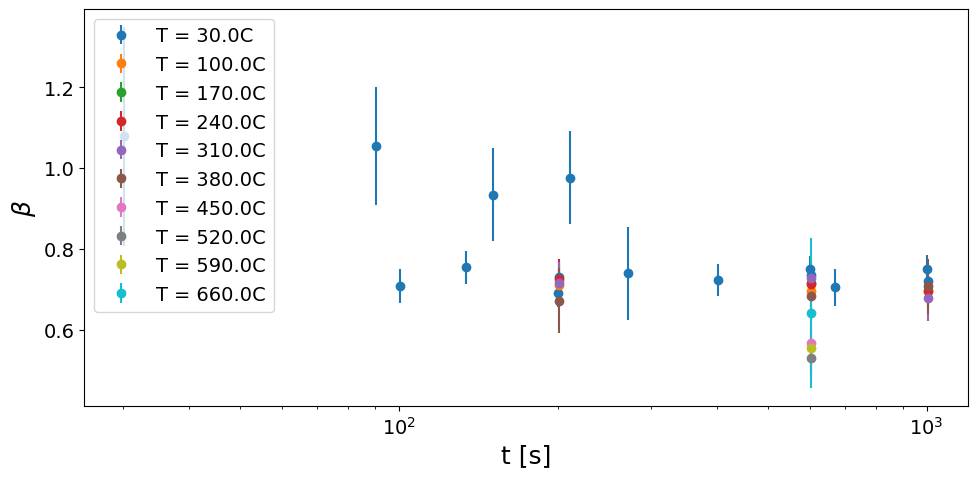

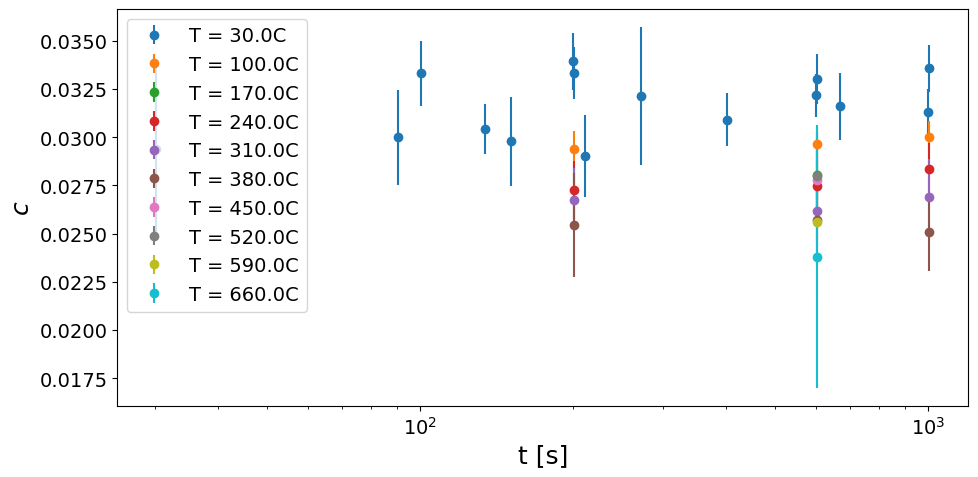

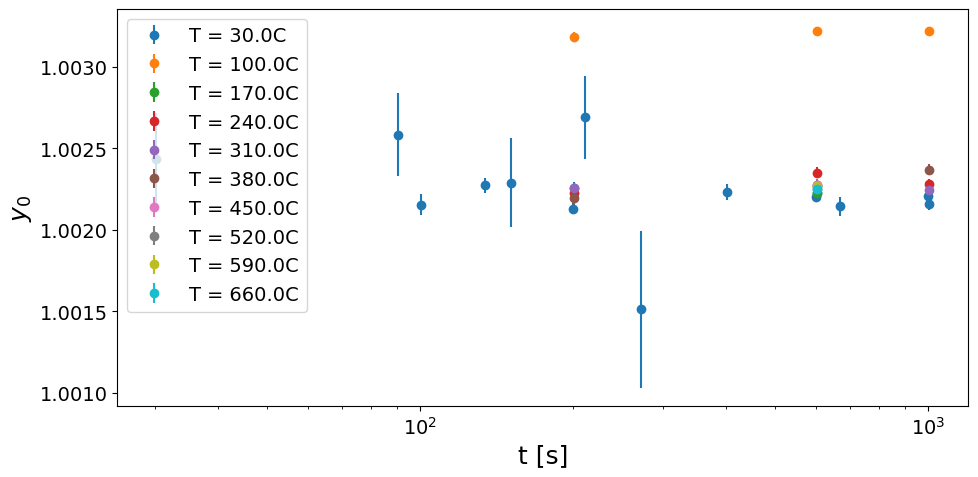

In [29]:
Ts = np.sort(df['T'].unique())

# tau
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.tau, yerr=df_temp.dtau, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.beta, yerr=df_temp.dbeta, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# c
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.c, yerr=df_temp.dc, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
'GeO2_6_520C_0001_0001': ,
'GeO2_6_590C_0001_0003': ,
plt.ylabel(r'$c$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.y0, yerr=df_temp.dy0, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();

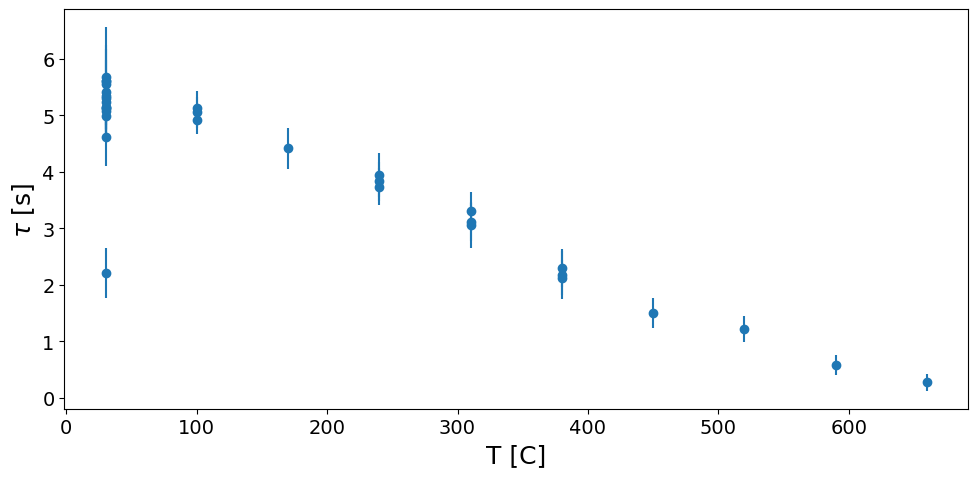

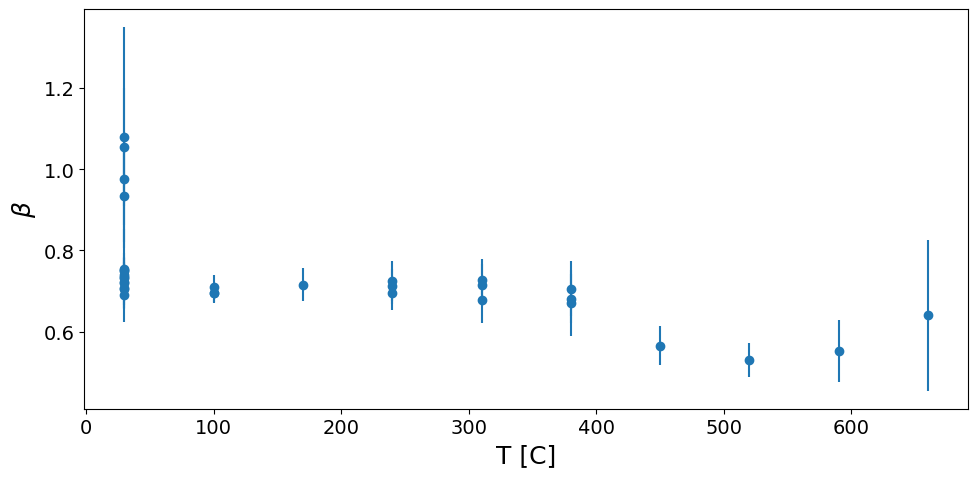

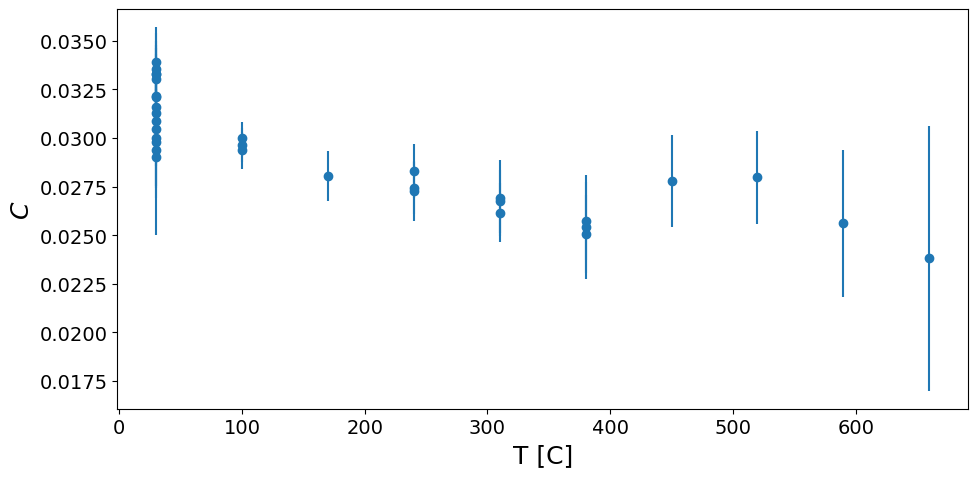

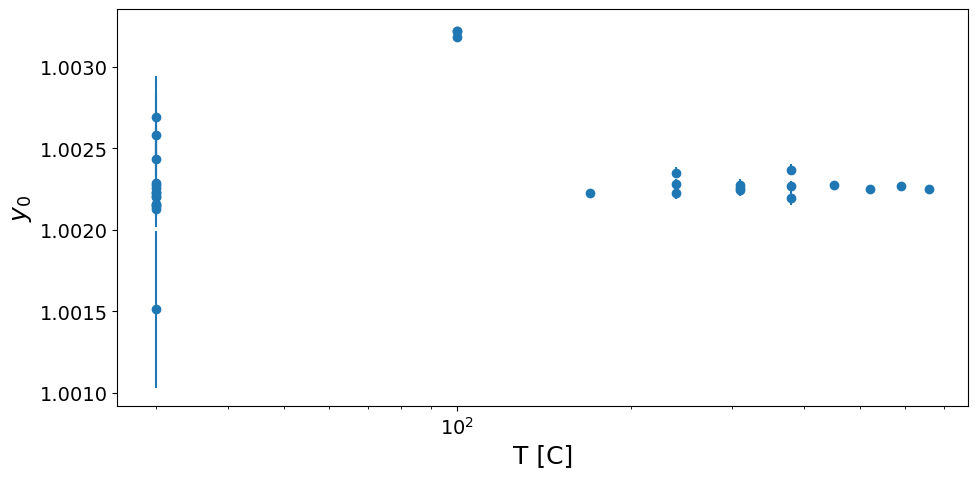

In [41]:

# tau
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['tau'], yerr=df['dtau'], fmt='o')
#plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$\tau$ [s]')
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['beta'], yerr=df['dbeta'], fmt='o')
#plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$\beta$')
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['c'], yerr=df['dc'], fmt='o')
#plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$C$')
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['y0'], yerr=df['dy0'], fmt='o')
plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$y_0$')
plt.tight_layout(), plt.show();



In [ ]:
'GeO2_6_380C_0001_0001': ,
'GeO2_6_450C_0001_0003': ,
'GeO2_6_660C_0001_0001': ,